In [83]:
import numpy as np
import quantities as pq
import elephant
from elephant.statistics import isi
#import vizi
#import misc
import matplotlib.pyplot as plt
import neo
import seaborn as sns
%matplotlib inline

from elephant.conversion import BinnedSpikeTrain
from quantities import Hz, s, ms

from scipy import stats
import matplotlib.colors as colors

In [49]:
def ProcessSelfCorr(data):
    corr = elephant.spike_train_correlation.corrcoef(BinnedSpikeTrain(data[:], binsize=100*ms))
    x = corr[np.tril_indices(corr.shape[0])]
    return x

In [52]:
data1 = np.load('data/data1.npy')
data2 = np.load('data/data2.npy')
data3 = np.load('data/data3.npy')
data4 = np.load('data/data4.npy')
data5 = np.load('data/data5.npy')
data6 = np.load('data/data6.npy')

p1 = ProcessSelfCorr(data1)
p2 = ProcessSelfCorr(data2)
p3 = ProcessSelfCorr(data3)
p4 = ProcessSelfCorr(data4)
p5 = ProcessSelfCorr(data5)
p6 = ProcessSelfCorr(data6)

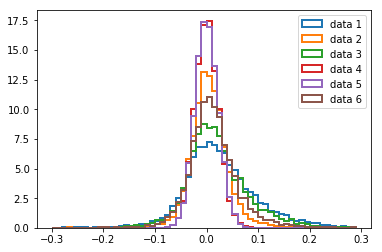

In [64]:
bins = np.arange(-.3, .3, 0.01)

plt.hist(p1, bins=bins, histtype='step', lw=2, label='data 1', density=True)
plt.hist(p2, bins=bins, histtype='step', lw=2, label='data 2', density=True)
plt.hist(p3, bins=bins, histtype='step', lw=2, label='data 3', density=True)
plt.hist(p4, bins=bins, histtype='step', lw=2, label='data 4', density=True)
plt.hist(p5, bins=bins, histtype='step', lw=2, label='data 5', density=True)
plt.hist(p6, bins=bins, histtype='step', lw=2, label='data 6', density=True)
plt.legend(loc='best')
plt.show()

In [75]:
dists = [p1,p2,p3,p4,p5,p6]

Res = np.zeros((len(dists), len(dists)))
for i in range(len(dists)):
    for j in range(len(dists)):
        Res[i,j] = stats.ks_2samp(dists[i], dists[j])[1]

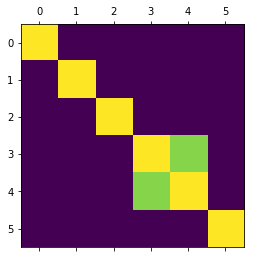

In [88]:
plt.matshow(Res, )

In [93]:
Res

array([[1.00000000e+000, 6.21126005e-168, 3.78222274e-014,
        0.00000000e+000, 0.00000000e+000, 1.75517609e-070],
       [6.21126005e-168, 1.00000000e+000, 4.92552806e-092,
        2.10718788e-042, 3.19128856e-040, 8.40800230e-026],
       [3.78222274e-014, 4.92552806e-092, 1.00000000e+000,
        7.66610575e-243, 1.04804193e-234, 4.88409055e-024],
       [0.00000000e+000, 2.10718788e-042, 7.66610575e-243,
        1.00000000e+000, 8.19316478e-001, 4.19447195e-128],
       [0.00000000e+000, 3.19128856e-040, 1.04804193e-234,
        8.19316478e-001, 1.00000000e+000, 1.46457024e-122],
       [1.75517609e-070, 8.40800230e-026, 4.88409055e-024,
        4.19447195e-128, 1.46457024e-122, 1.00000000e+000]])